## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from pmdarima import auto_arima

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Regression Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('EUNG Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Import Data

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/EUNG.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,EUNG,EUNG_LAG,Equity Market Volatility,Economic Policy Uncertainty Europe,NY Business Conditions,3 Month Treasury Bill,Infectious Disease Tracker,Nickel,COV19,RUWAR
DATE,,,,,,,,,,
2001-10-01,-0.154151,0.000000,22.46,141.35,-4.5,-0.72,0.39,-0.088497,0,0
2001-11-01,0.000000,-0.154151,-13.09,-10.39,-2.2,-0.48,-0.06,-0.045894,0,0
2001-12-01,-0.006192,0.000000,-2.94,-39.39,-6.8,-0.29,0.09,0.060355,0,0
2002-01-01,-0.143340,-0.006192,-2.04,-53.76,11.7,-0.18,-0.39,0.035324,0,0
2002-02-01,0.000000,-0.143340,4.29,-5.87,11.2,-0.04,0.29,0.131247,0,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.031592,-0.316354,2.93,21.28,-42.6,0.22,2.32,-0.071308,1,1
2023-07-01,-0.068368,0.031592,-5.14,-18.30,38.4,0.02,-2.45,-0.041580,1,1
2023-08-01,0.109307,-0.068368,-0.72,16.36,-5.5,0.09,-0.81,-0.006711,1,1


## Test Importance

In [12]:
y = df['EUNG']
X = df[["EUNG_LAG","Equity Market Volatility","Economic Policy Uncertainty Europe","NY Business Conditions","3 Month Treasury Bill","Infectious Disease Tracker","Nickel","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   EUNG   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.990
Date:                Sat, 20 Jan 2024   Prob (F-statistic):             0.0409
Time:                        13:09:55   Log-Likelihood:                 157.67
No. Observations:                 265   AIC:                            -295.3
Df Residuals:                     255   BIC:                            -259.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Prune Dataset

In [5]:
selected_columns = ["EUNG","EUNG_LAG","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,EUNG,EUNG_LAG,COV19,RUWAR
DATE,,,,
2001-10-01,-0.154151,0.000000,0,0
2001-11-01,0.000000,-0.154151,0,0
2001-12-01,-0.006192,0.000000,0,0
2002-01-01,-0.143340,-0.006192,0,0
2002-02-01,0.000000,-0.143340,0,0
...,...,...,...,...
2023-06-01,0.031592,-0.316354,1,1
2023-07-01,-0.068368,0.031592,1,1
2023-08-01,0.109307,-0.068368,1,1


## Simple Regressor

In [13]:
train = pruned_df[:-24]
test = pruned_df[-24:]

X_train = train[['EUNG_LAG']]
y_train = train['EUNG']

X_test = test[['EUNG_LAG']]
y_test = test['EUNG']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EUNG   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     37.28
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           4.11e-09
Time:                        13:16:25   Log-Likelihood:                 224.03
No. Observations:                 241   AIC:                            -444.1
Df Residuals:                     239   BIC:                            -437.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.006      0.940      0.3

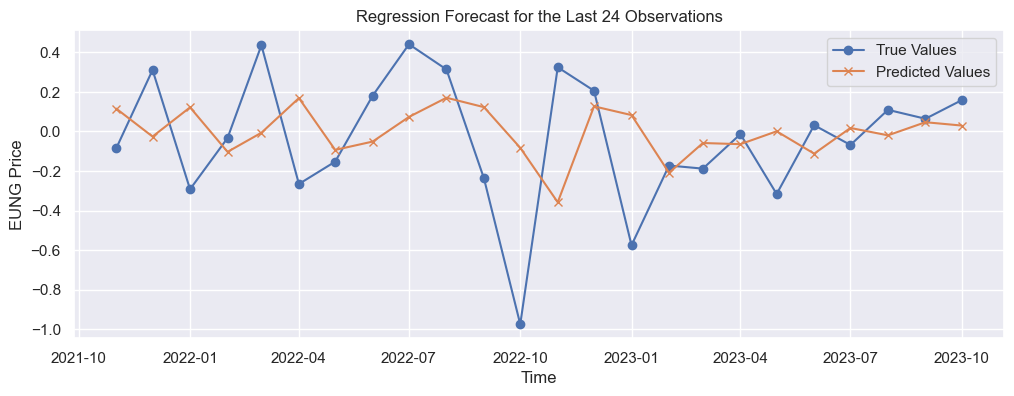

In [7]:
# Make predictions
predictions = model.predict(X_test)

plotFor(y_test,predictions)

In [8]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.2672
MAPE: 134.5540 %
MSE: 0.1226
RMSE: 0.3501


### Save

In [9]:
df = pd.DataFrame({'EUNG M UR': predictions, 'Actual': y_test})
df.to_excel("EUNG_M_UR_forecast.xlsx", index=True)
df

,EUNG M UR,Actual
DATE,,
2021-11-01,0.115366,-0.085031
2021-12-01,-0.025922,0.310788
2022-01-01,0.121857,-0.292332
2022-02-01,-0.103318,-0.033172
2022-03-01,-0.006561,0.436124
2022-04-01,0.168651,-0.265797
2022-05-01,-0.093411,-0.152693
2022-06-01,-0.051184,0.181046
2022-07-01,0.073418,0.440986


In [10]:
# Open a file in write mode
with open('EUNG M UR Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')

## Multiple Regressor

In [15]:
train = pruned_df[:-24]
test = pruned_df[-24:]

X_train = train[["EUNG_LAG","COV19","RUWAR"]]
y_train = train["EUNG"]

X_test = test[["EUNG_LAG","COV19","RUWAR"]]
y_test = test["EUNG"]


# Fit the regression model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   EUNG   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.166
Method:                 Least Squares   F-statistic:                              24.92
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                    1.47e-10
Time:                        13:24:06   Log-Likelihood:                          228.55
No. Observations:                 241   AIC:                                     -453.1
Df Residuals:                     239   BIC:                                     -446.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


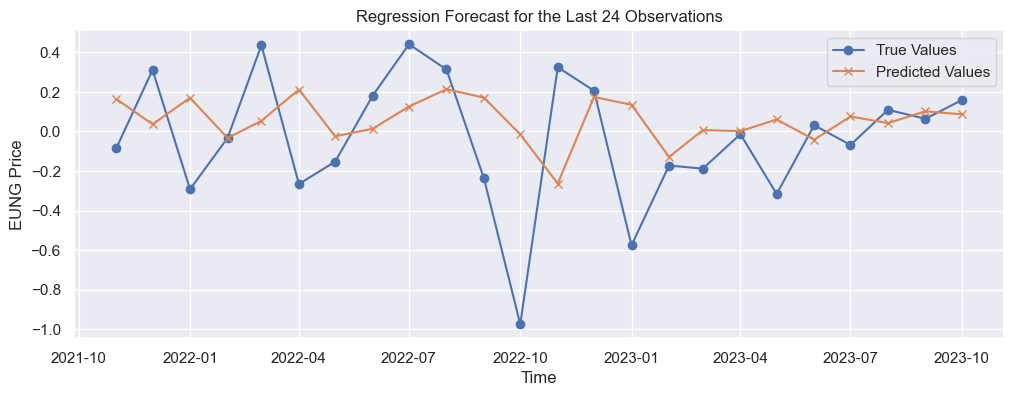

In [10]:
# Make predictions
predictions = model.predict(X_test)

plotFor(y_test,predictions)

In [11]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.2616
MAPE: 110.2334 %
MSE: 0.1266
RMSE: 0.3558


### Save

In [14]:
df = pd.DataFrame({'EUNG M MR': predictions, 'Actual': y_test})
df.to_excel("EUNG_M_MR_forecast.xlsx", index=True)
df

,EUNG M MR,Actual
DATE,,
2021-11-01,0.163995,-0.085031
2021-12-01,0.036440,0.310788
2022-01-01,0.169855,-0.292332
2022-02-01,-0.033433,-0.033172
2022-03-01,0.053920,0.436124
2022-04-01,0.212102,-0.265797
2022-05-01,-0.024489,-0.152693
2022-06-01,0.013634,0.181046
2022-07-01,0.126124,0.440986


In [15]:
# Open a file in write mode
with open('EUNG M MR Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')